## Figure 7 - NPGO Paper

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

## Data are from the following notebooks:
Experiments1and2_Nutrients_Data.ipynb\
Experiments3and4_TempThreshold_Data.ipynb\
Experiments5and6_Winds_Data.ipynb\
Experiments7and8_ThermalForcing_Data.ipynb\
Experiments9and10_Rivers_Data.ipynb

#### SST Summary

In [2]:
CY_SST_Orig=[ 6.12548543,  5.80986749,  7.48572357,  9.13112748, 12.73411507,
       16.15264921, 18.19417126, 18.16483525, 15.4019242 , 12.00080142,
        9.30544262,  6.33640542]

In [3]:
CY_SST_Nuts=[ 6.13830953,  5.82549722,  7.48766262,  9.10256158, 12.68796849,
       16.20069323, 18.13362829, 18.18589498, 15.38127229, 11.96611296,
        9.38018667,  6.34800222]

In [4]:
CY_SST_Thresh=[ 6.15109604,  5.8556036 ,  7.47975049,  9.10203945, 12.70656031,
       16.08675342, 18.27222176, 18.2109748 , 15.41443395, 11.9993017 ,
        9.32771591,  6.42471353]

In [5]:
CY_SST_Winds=[ 5.59662968,  5.90259706,  7.60633249,  9.04497093, 13.09915475,
       16.51518926, 20.73906041, 19.60519318, 16.00876067, 11.95839157,
        9.37915939,  6.13304258]

In [6]:
CY_SST_Thermal=[ 6.55805313,  4.6761362 ,  6.77186194, 10.27311911, 13.59493183,
       17.42428301, 18.35690238, 18.73194292, 16.01386188, 11.39800505,
        8.80717597,  6.78115408]

In [7]:
CY_SST_Rivers=[ 6.11334258,  5.87921074,  7.48800428,  9.09396314, 12.75033495,
       16.07578677, 17.97372228, 18.18481324, 15.3735647 , 11.97804754,
        9.27182311,  6.43142438]

#### Surface PAR Summary

In [8]:
CY_PAR_Orig=[ 14.23656201,  25.43115062,  41.18548663,  59.62425692,
        84.90996976,  94.11623964, 100.57448297,  80.0413251 ,
        60.47416396,  29.24353915,  13.14300199,  10.14804782]

In [9]:
CY_PAR_Nuts=[ 14.23679829,  25.43165744,  41.19107135,  59.75958975,
        85.18338548,  94.02408369, 100.44978733,  80.01338611,
        60.86782944,  29.30627043,  13.14189992,  10.14616278]

In [10]:
CY_PAR_Thresh=[ 14.23694213,  25.42996031,  41.18085163,  59.76610693,
        84.90226449,  94.06975087, 100.70847597,  79.87635294,
        60.07499117,  29.22549197,  13.13997812,  10.14688224]

In [11]:
CY_PAR_Winds=[ 14.22929443,  25.46042814,  40.97263571,  59.96603881,
        84.80457427,  94.07934195, 101.42659579,  80.66420632,
        60.70089652,  29.308822  ,  13.13657237,  10.14639563]

In [12]:
CY_PAR_Thermal=[ 15.32649944,  26.11869233,  53.62521119,  62.5976493 ,
        90.68618976, 103.30374366,  93.93976964,  79.87383634,
        51.12972378,  31.54723225,  20.31534137,   8.03696216]

In [13]:
CY_PAR_Rivers=[ 14.23691735,  25.43099464,  41.17917068,  59.83653825,
        85.16592265,  93.9387496 , 100.45387598,  80.0917271 ,
        60.47075832,  29.24338572,  13.14281766,  10.14914155]

#### Halocline Summary

In [14]:
CY_Halo_Orig=[0.24051982, 0.67116015, 0.49243159, 0.66998316, 1.90583354,
       2.39576078, 1.47431471, 1.41058524, 1.23433735, 0.80587692,
       0.68233926, 0.53663027]

In [15]:
CY_Halo_Nuts=[0.23752941, 0.63396048, 0.48768099, 0.61599326, 1.56442715,
       2.35102508, 1.44770793, 1.34585816, 1.23384271, 0.83535316,
       0.66548312, 0.57292803]

In [16]:
CY_Halo_Thresh=[0.2444939 , 0.61571177, 0.44665777, 0.6627658 , 1.81397565,
       2.34781621, 1.46515038, 1.38864157, 1.20166323, 0.83278059,
       0.68750955, 0.50213517]

In [17]:
CY_Halo_Winds=[0.43660533, 0.37044598, 0.83569275, 0.73468569, 2.00271344,
       2.85756909, 3.35009795, 1.92678914, 1.44402677, 0.50235841,
       1.0366904 , 0.76952968]

In [18]:
CY_Halo_Thermal=[0.27519593, 0.58094923, 0.44808606, 0.61038868, 1.6451783 ,
       2.3691709 , 1.48569156, 1.47417957, 1.26240626, 0.86845728,
       0.67721426, 0.53281211]

In [19]:
CY_Halo_Rivers=[0.25069044, 0.62134257, 0.38932114, 0.95954486, 1.4824841 ,
       1.91582917, 1.28698258, 1.44149623, 1.14937059, 1.10101823,
       0.87432615, 0.51783257]

### Nitrate Summary

In [20]:
CY_Orig_N=[24.75940603, 23.24451257, 21.67931533,  9.49131555,  6.21805258,
        2.60290254,  2.49482242,  5.34246862, 11.184194  , 15.54722773,
       21.87987576, 23.24806845]

In [21]:
CY_Nuts_N=[23.9644255 , 22.29828934, 20.45139818,  8.97187906,  5.34151849,
        1.96037127,  1.81394895,  4.30505968, 11.52311063, 16.41310313,
       21.46072197, 22.33267238]

In [22]:
CY_Thresh_N=[24.77422039, 23.29999955, 21.7438187 ,  9.87203474,  6.32937779,
        2.56494218,  2.649082  ,  4.58757776,  7.08316269, 15.02847707,
       21.88930665, 23.35885963]

In [23]:
CY_Winds_N=[24.13891096, 23.43445999, 20.16081944,  9.53873272,  5.7397893 ,
        2.06754755,  0.95348431,  2.25127683,  8.106326  , 16.05059715,
       20.61628598, 23.32419151]

In [24]:
CY_Thermal_N=[24.61595001, 23.26098825, 20.61280733,  7.68941071,  5.75685816,
        1.97729292,  2.72072923,  4.003872  , 11.9685279 , 19.67454109,
       23.13616984, 23.96606766]

In [25]:
CY_Rivers_N=[24.74045154, 23.38186726, 21.69020601, 10.37701929,  5.74879707,
        2.70849594,  2.85380337,  5.48641413, 11.13281657, 15.64983911,
       21.55740055, 23.13323183]

#### Silicon Summary

In [26]:
CY_Orig_Si=[50.11491397, 51.4414015 , 50.00709959, 24.5001276 ,  9.95727285,
        8.81748288,  7.44068909,  9.67266691, 22.68525289, 29.63323648,
       41.74223596, 46.96035035]

In [27]:
CY_Nuts_Si=[47.7632301 , 49.11254302, 47.48290684, 23.36581641,  8.2090725 ,
       11.07120201, 11.99591242, 12.30988367, 25.86081355, 32.83781192,
       41.9107794 , 46.15827035]

In [28]:
CY_Thresh_Si=[50.13888235, 51.47213852, 50.01017314, 25.05295036,  9.56076795,
        6.89618133,  3.9125294 ,  4.51631545,  7.42875662, 19.71116328,
       38.33231021, 45.14306696]

In [29]:
CY_Winds_Si=[50.06105751, 51.39125156, 49.65665279, 23.79865366,  8.11240424,
       10.9729251 , 13.07850414, 11.59949357, 21.74708727, 35.04296807,
       42.83359454, 47.61766334]

In [30]:
CY_Thermal_Si=[50.04129223, 51.42741271, 47.97131586, 17.22230011,  7.05583654,
       10.13642248, 13.54628137, 15.74654144, 32.40864067, 40.63494107,
       46.43542205, 50.00465601]

In [31]:
CY_Rivers_Si=[50.13663507, 51.513422  , 50.16886923, 27.00665494,  8.25802888,
        7.09006067,  6.40147506,  9.4362604 , 22.08336301, 30.14843401,
       41.93311685, 47.46025761]

#### Diatom Summary

In [32]:
CY_Diat_Orig=[ 0.23982064,  0.17371493,  3.13439335, 38.20802266, 35.26040455,
       20.78222047, 19.78868161, 10.83708083,  9.15037476,  1.56574763,
        0.69712752,  0.49628067]

In [33]:
CY_Diat_Nuts=[ 0.23862619,  0.17259154,  3.03130916, 35.88205354, 31.55947094,
       15.65210445, 17.19965861, 10.24639004,  4.86930885,  1.22387145,
        0.67081294,  0.45610902]

In [34]:
CY_Diat_Thresh=[ 0.23841182,  0.17512783,  3.16494256, 36.63234263, 34.80147671,
       22.14162946, 20.22215462, 14.54490841, 19.63002983,  3.79048587,
        1.16383968,  0.85648795]

In [35]:
CY_Diat_Winds=[ 0.23412573,  0.1572702 ,  4.01715842, 35.63039506, 38.12295916,
       16.12961134, 13.7174575 ,  7.94355529,  4.27612511,  0.95877994,
        0.58034538,  0.41772271]

In [36]:
CY_Diat_Thermal=[ 0.24531845,  0.1722018 , 11.15381515, 35.62884681, 32.77864728,
       17.98166513, 15.88818571,  8.06120314,  0.97470466,  0.65459443,
        1.07020377,  0.641704 ]

In [37]:
CY_Diat_Rivers=[ 0.23932773,  0.17097974,  3.09714916, 35.42740652, 32.1912089 ,
       19.12590297, 20.34302593, 11.20385005,  9.36346982,  1.66558406,
        0.72738703,  0.4823474 ]

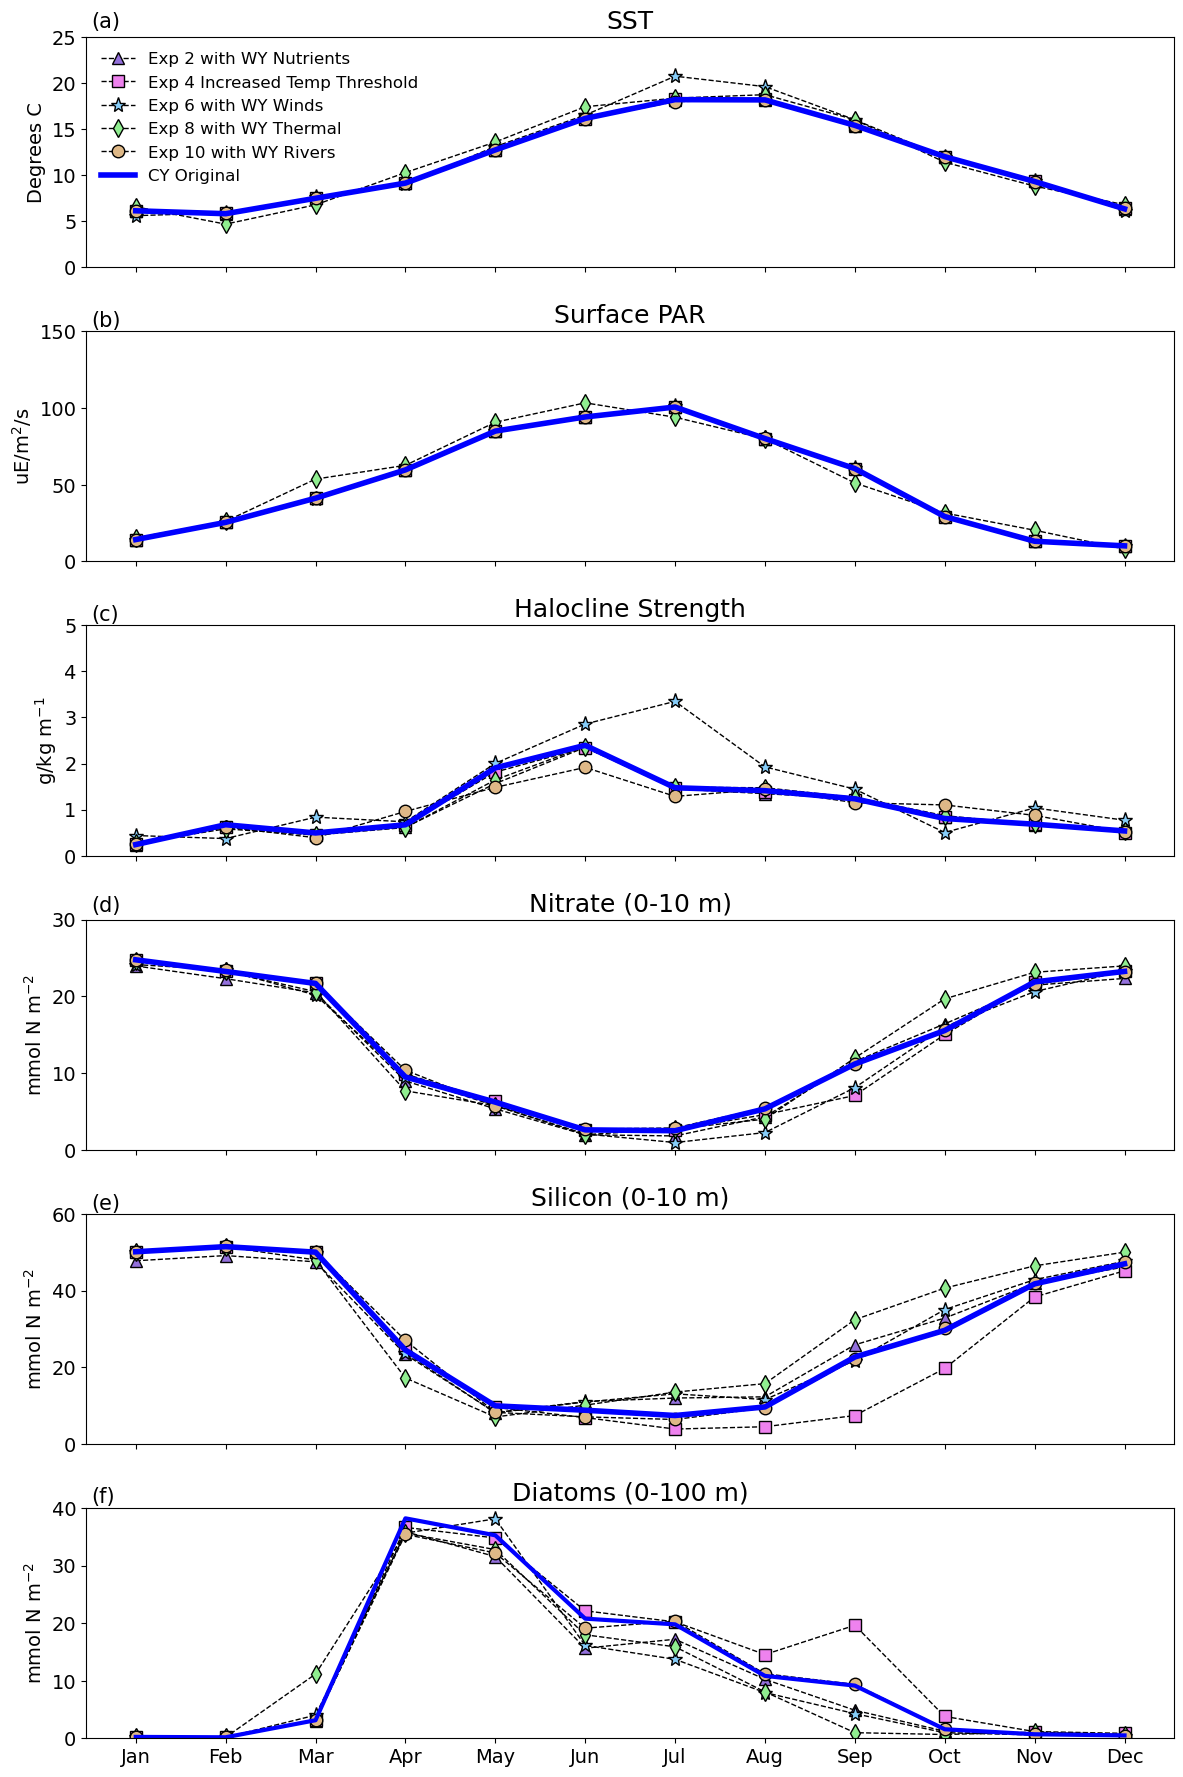

In [39]:
fig,ax=plt.subplots(6,1,figsize=(12,18))

fig.tight_layout(pad=2.5)

months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


ax[0].plot(xticks,CY_SST_Nuts,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='Exp 2 with WY Nutrients')
ax[0].plot(xticks,CY_SST_Thresh,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='Exp 4 Increased Temp Threshold')
ax[0].plot(xticks,CY_SST_Winds,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='Exp 6 with WY Winds')
ax[0].plot(xticks,CY_SST_Thermal,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='Exp 8 with WY Thermal')
ax[0].plot(xticks,CY_SST_Rivers,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='Exp 10 with WY Rivers')
ax[0].plot(xticks,CY_SST_Orig,'-',color='b',markersize=9,linewidth=4,label='CY Original')

ax[0].legend(frameon=False,loc=2,fontsize=12)
ax[0].set_ylabel('Degrees C',fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylim(0,25)
ax[0].set_title('SST',fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticklabels([])
ax[0].text(-.5, 26, '(a)', fontsize=15,  color='k')


ax[1].plot(xticks,CY_PAR_Nuts,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[1].plot(xticks,CY_PAR_Thresh,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[1].plot(xticks,CY_PAR_Winds,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[1].plot(xticks,CY_PAR_Thermal,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[1].plot(xticks,CY_PAR_Rivers,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
ax[1].plot(xticks,CY_PAR_Orig,'-',color='b',markersize=9,linewidth=4,label='CY Original')

ax[1].legend((),frameon=False)
ax[1].set_ylabel('uE/m$^{2}$/s',fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylim(0,150)
ax[1].set_title('Surface PAR',fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticklabels([])
ax[1].text(-.5, 153, '(b)', fontsize=15,  color='k')


ax[2].plot(xticks,CY_Halo_Nuts,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[2].plot(xticks,CY_Halo_Thresh,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[2].plot(xticks,CY_Halo_Winds,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[2].plot(xticks,CY_Halo_Thermal,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[2].plot(xticks,CY_Halo_Rivers,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
ax[2].plot(xticks,CY_Halo_Orig,'-',color='b',markersize=9,linewidth=4,label='CY Original')

ax[2].legend((),frameon=False)
ax[2].set_ylabel('g/kg m$^{-1}$',fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylim(0,5)
ax[2].set_title('Halocline Strength',fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=14)
ax[2].yaxis.set_tick_params(labelsize=14)
ax[2].set_xticklabels([])
ax[2].text(-.5, 5.1, '(c)', fontsize=15,  color='k')


ax[3].plot(xticks,CY_Nuts_N,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[3].plot(xticks,CY_Thresh_N,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[3].plot(xticks,CY_Winds_N,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[3].plot(xticks,CY_Thermal_N,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[3].plot(xticks,CY_Rivers_N,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
ax[3].plot(xticks,CY_Orig_N,'-',color='b',markersize=9,linewidth=4,label='CY Original')

ax[3].legend((),frameon=False)
ax[3].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylim(0,30)
ax[3].set_title('Nitrate (0-10 m)',fontsize=18)
ax[3].xaxis.set_tick_params(labelsize=14)
ax[3].yaxis.set_tick_params(labelsize=14)
ax[3].set_xticklabels([])
ax[3].text(-.5, 31, '(d)', fontsize=15,  color='k')


ax[4].plot(xticks,CY_Nuts_Si,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[4].plot(xticks,CY_Thresh_Si,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[4].plot(xticks,CY_Winds_Si,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[4].plot(xticks,CY_Thermal_Si,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[4].plot(xticks,CY_Rivers_Si,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
ax[4].plot(xticks,CY_Orig_Si,'-',color='b',markersize=9,linewidth=4,label='CY Original')

ax[4].legend((),frameon=False)
ax[4].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[4].set_xlabel('')
ax[4].set_ylim(0,60)
ax[4].set_title('Silicon (0-10 m)',fontsize=18)
ax[4].xaxis.set_tick_params(labelsize=14)
ax[4].yaxis.set_tick_params(labelsize=14)
ax[4].set_xticklabels([])
ax[4].text(-.5, 61, '(e)', fontsize=15,  color='k')


ax[5].plot(xticks,CY_Diat_Nuts,'--',marker='^',markersize=9,markerfacecolor='mediumpurple', linewidth=1,color='k',label='CY with WY Nutrients')
ax[5].plot(xticks,CY_Diat_Thresh,'--',marker='s',markersize=9,markerfacecolor='violet', linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[5].plot(xticks,CY_Diat_Winds,'--',marker='*',markersize=11,markerfacecolor='lightskyblue', linewidth=1,color='k',label='CY with WY Winds')
ax[5].plot(xticks,CY_Diat_Thermal,'--',marker='d',markersize=9,markerfacecolor='lightgreen', linewidth=1,color='k',label='CY with WY Thermal')
ax[5].plot(xticks,CY_Diat_Rivers,'--',marker='o',markersize=9,markerfacecolor='burlywood', linewidth=1,color='k',label='CY with WY Rivers')
ax[5].plot(xticks,CY_Diat_Orig,'-',color='b',markersize=9,linewidth=3,label='CY Original')

ax[5].legend((),frameon=False)
ax[5].set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax[5].set_xlabel('')
ax[5].set_ylim(0,40)
ax[5].set_title('Diatoms (0-100 m)',fontsize=18)
ax[5].xaxis.set_tick_params(labelsize=14)
ax[5].yaxis.set_tick_params(labelsize=14)
ax[5].text(-.5, 41, '(f)', fontsize=15,  color='k')

#ax[5].set_xticklabels([])

#fig.suptitle('Warm Year Experiments')

#plt.savefig('Figure7_CYExperiments.png', bbox_inches='tight',dpi=1000,transparent=False)

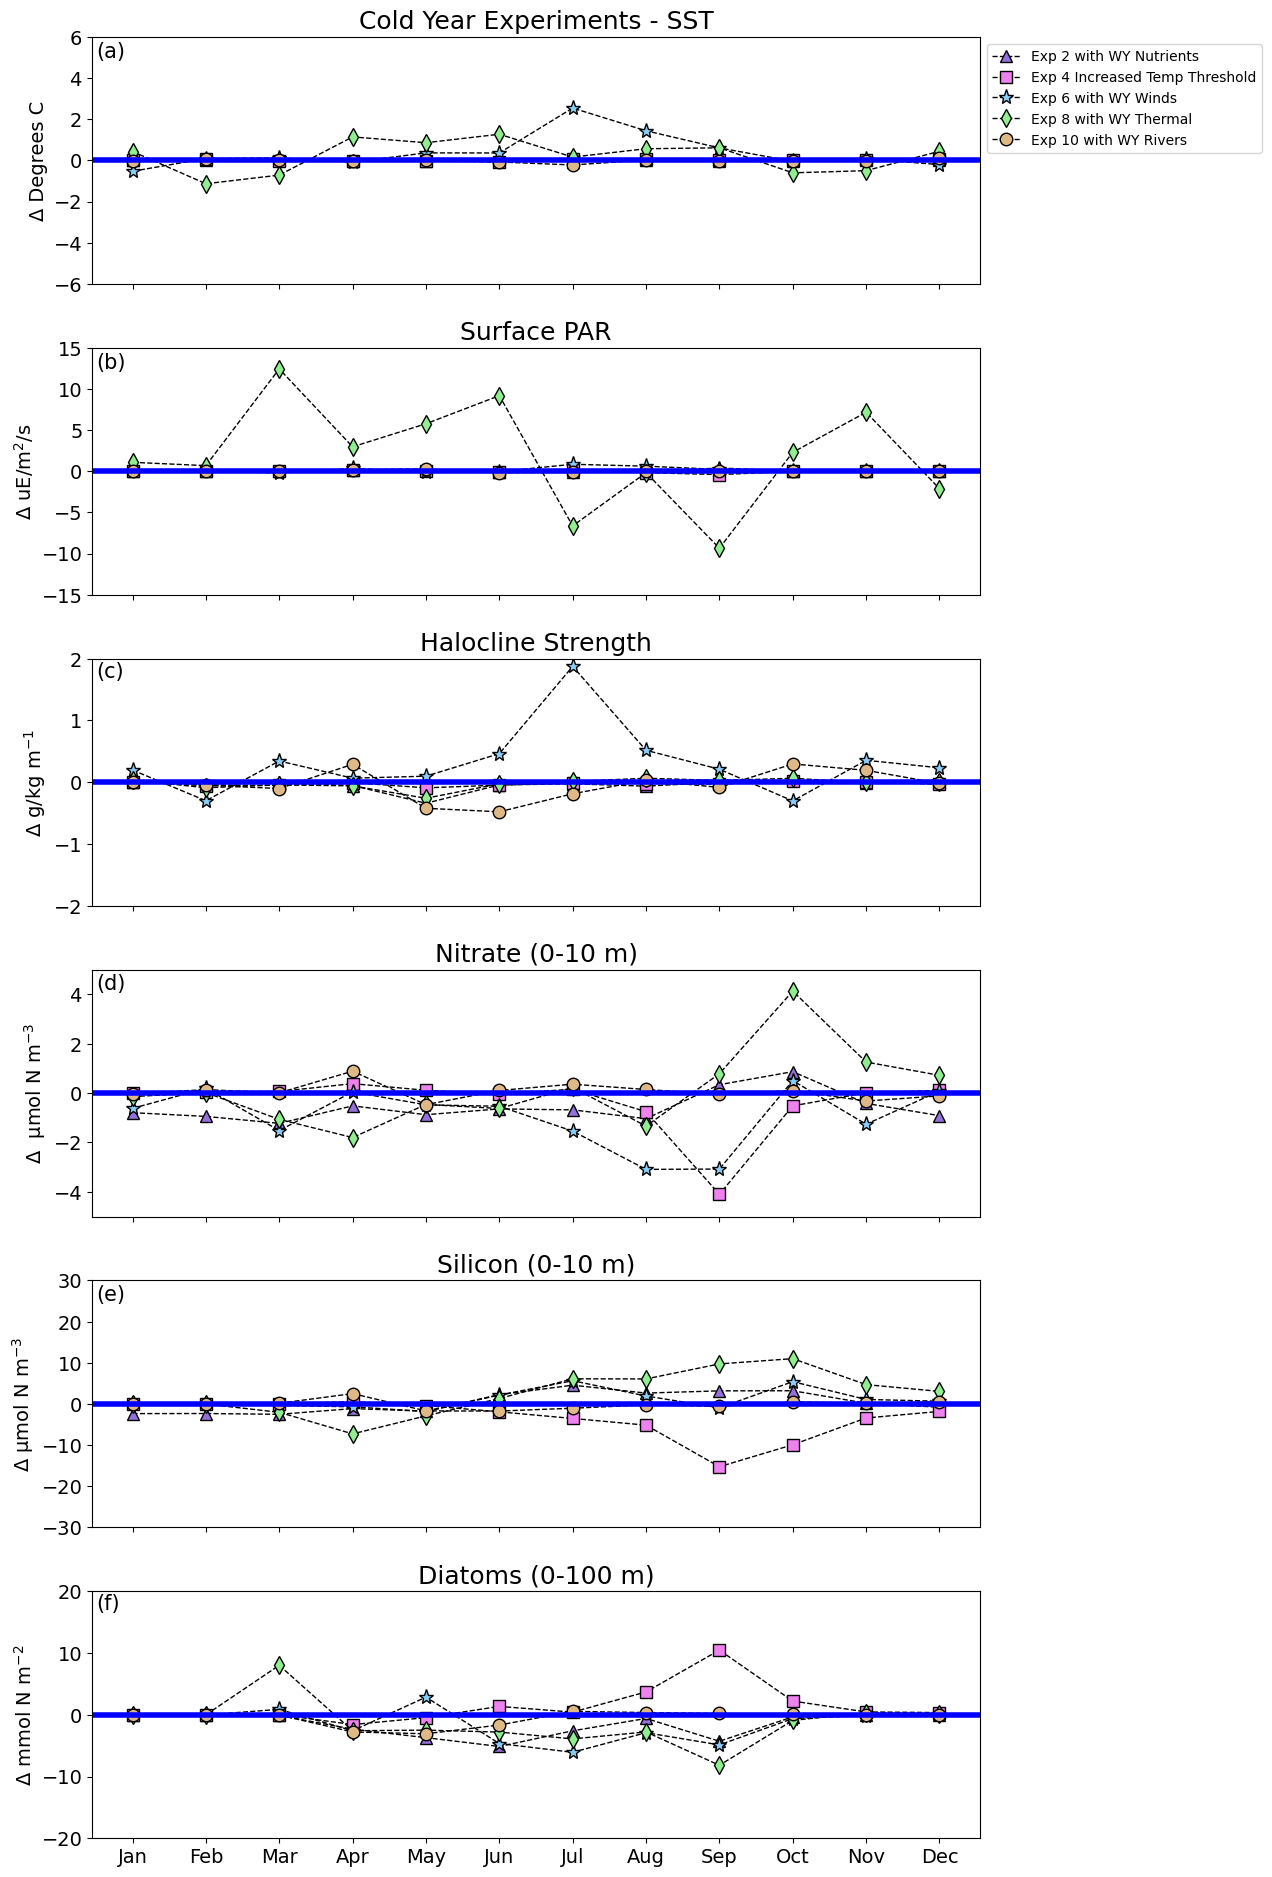

In [41]:
fig,ax=plt.subplots(6,1,figsize=(10,19))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]


fig.tight_layout(pad=2.5)

ax[0].plot(xticks,np.subtract(CY_SST_Nuts,CY_SST_Orig),'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='Exp 2 with WY Nutrients')
ax[0].plot(xticks,np.subtract(CY_SST_Thresh,CY_SST_Orig),'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='Exp 4 Increased Temp Threshold')
ax[0].plot(xticks,np.subtract(CY_SST_Winds,CY_SST_Orig),'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='Exp 6 with WY Winds')
ax[0].plot(xticks,np.subtract(CY_SST_Thermal,CY_SST_Orig),'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='Exp 8 with WY Thermal')
ax[0].plot(xticks,np.subtract(CY_SST_Rivers,CY_SST_Orig),'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='Exp 10 with WY Rivers')
#ax.plot(xticks,CY_Orig,'-',color='r',linewidth=3,label='CY Original')

ax[0].legend(frameon=True,bbox_to_anchor=(1, 1))
ax[0].set_ylabel('\u0394 Degrees C',fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylim(-6,6)
ax[0].axhline(y=0,linewidth=4,color='b')
ax[0].set_title('Cold Year Experiments - SST',fontsize=18)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].set_xticklabels([])
ax[0].text(-.5, 5, '(a)', fontsize=15,  color='k')


ax[1].plot(xticks,np.subtract(CY_PAR_Nuts,CY_PAR_Orig),'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[1].plot(xticks,np.subtract(CY_PAR_Thresh,CY_PAR_Orig),'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[1].plot(xticks,np.subtract(CY_PAR_Winds,CY_PAR_Orig),'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[1].plot(xticks,np.subtract(CY_PAR_Thermal,CY_PAR_Orig),'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[1].plot(xticks,np.subtract(CY_PAR_Rivers,CY_PAR_Orig),'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
#ax.plot(xticks,CY_Orig,'-',color='r',linewidth=3,label='CY Original')

ax[1].legend((),frameon=False)
ax[1].set_ylabel('\u0394 uE/m$^{2}$/s',fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylim(-15,15)
ax[1].axhline(y=0,linewidth=4,color='b')
ax[1].set_title('Surface PAR',fontsize=18)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].set_xticklabels([])
ax[1].text(-.5, 12.5, '(b)', fontsize=15,  color='k')




ax[2].plot(xticks,np.subtract(CY_Halo_Nuts,CY_Halo_Orig),'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[2].plot(xticks,np.subtract(CY_Halo_Thresh,CY_Halo_Orig),'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[2].plot(xticks,np.subtract(CY_Halo_Winds,CY_Halo_Orig),'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[2].plot(xticks,np.subtract(CY_Halo_Thermal,CY_Halo_Orig),'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[2].plot(xticks,np.subtract(CY_Halo_Rivers,CY_Halo_Orig),'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
#ax.plot(xticks,CY_Orig,'-',color='r',linewidth=3,label='CY Original')

ax[2].legend((),frameon=False)
ax[2].set_ylabel('\u0394 g/kg m$^{-1}$',fontsize=14)
ax[2].set_xlabel('')
ax[2].set_ylim(-2,2)
ax[2].axhline(y=0,linewidth=4,color='b')
ax[2].set_title('Halocline Strength',fontsize=18)
ax[2].xaxis.set_tick_params(labelsize=14)
ax[2].yaxis.set_tick_params(labelsize=14)
ax[2].set_xticklabels([])
ax[2].text(-.5, 1.7, '(c)', fontsize=15,  color='k')



ax[3].plot(xticks,np.subtract(CY_Nuts_N,CY_Orig_N),'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[3].plot(xticks,np.subtract(CY_Thresh_N,CY_Orig_N),'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[3].plot(xticks,np.subtract(CY_Winds_N,CY_Orig_N),'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[3].plot(xticks,np.subtract(CY_Thermal_N,CY_Orig_N),'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[3].plot(xticks,np.subtract(CY_Rivers_N,CY_Orig_N),'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
#ax.plot(xticks,CY_Orig_N,'-',color='r',linewidth=3,label='CY Original')

ax[3].legend((),frameon=False)
ax[3].set_ylabel('\u0394  \u03BCmol N m$^{-3}$',fontsize=14)
ax[3].set_xlabel('')
ax[3].set_ylim(-5,5)
ax[3].axhline(y=0,linewidth=4,color='b')
ax[3].set_title('Nitrate (0-10 m)',fontsize=18)
ax[3].xaxis.set_tick_params(labelsize=14)
ax[3].yaxis.set_tick_params(labelsize=14)
ax[3].set_xticklabels([])
ax[3].text(-.5, 4.2, '(d)', fontsize=15,  color='k')

ax[4].plot(xticks,np.subtract(CY_Nuts_Si,CY_Orig_Si),'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[4].plot(xticks,np.subtract(CY_Thresh_Si,CY_Orig_Si),'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[4].plot(xticks,np.subtract(CY_Winds_Si,CY_Orig_Si),'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[4].plot(xticks,np.subtract(CY_Thermal_Si,CY_Orig_Si),'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[4].plot(xticks,np.subtract(CY_Rivers_Si,CY_Orig_Si),'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
#ax.plot(xticks,CY_Orig_Si,'-',color='r',linewidth=3,label='CY Original')

ax[4].legend((),frameon=False)
ax[4].set_ylabel('\u0394 \u03BCmol N m$^{-3}$',fontsize=14)
ax[4].set_xlabel('')
ax[4].set_ylim(-30,30)
ax[4].axhline(y=0,linewidth=4,color='b')
ax[4].set_title('Silicon (0-10 m)',fontsize=18)
ax[4].xaxis.set_tick_params(labelsize=14)
ax[4].yaxis.set_tick_params(labelsize=14)
ax[4].set_xticklabels([])
ax[4].text(-.5, 25, '(e)', fontsize=15,  color='k')

ax[5].plot(xticks,np.subtract(CY_Diat_Nuts,CY_Diat_Orig),'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[5].plot(xticks,np.subtract(CY_Diat_Thresh,CY_Diat_Orig),'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[5].plot(xticks,np.subtract(CY_Diat_Winds,CY_Diat_Orig),'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[5].plot(xticks,np.subtract(CY_Diat_Thermal,CY_Diat_Orig),'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[5].plot(xticks,np.subtract(CY_Diat_Rivers,CY_Diat_Orig),'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
#ax.plot(xticks,CY_Orig,'-',color='r',linewidth=3,label='CY Original')

ax[5].legend((),frameon=False)
ax[5].set_ylabel('\u0394 mmol N m$^{-2}$',fontsize=14)
ax[5].set_xlabel('',fontsize=14)
ax[5].set_ylim(-20,20)
ax[5].axhline(y=0,linewidth=4,color='b')
ax[5].set_title('Diatoms (0-100 m)',fontsize=18)
ax[5].xaxis.set_tick_params(labelsize=14)
ax[5].yaxis.set_tick_params(labelsize=14)
#ax[5].set_xticklabels([])
ax[5].text(-.5, 17, '(f)', fontsize=15,  color='k')

#plt.savefig('FigureS12_CYExperiments.png', bbox_inches='tight',dpi=1000,transparent=False)